#### Logistic Regression

In the previous topic, you learned about regression tasks in the Machine Learning field. Classification is another popular type of task in Machine Learning, where instead of learning to predict a continuous value you learn the predict the discrete ones. The first type of e classification model that you will learn will be the LogisticRegression, which uses the linear regression as a base model and adapts it to classification tasks.

In this task, I invite you to train 2 models on the Body performance Data that should predict the **class** column. The models are the following:

- the LogisticRegression from sklearn.
- the Log_reg implementation offered in SMLH. ( Sigmoid Machine Learning Handbook)

In [39]:
# import libraries for data procesing
import numpy as np
import pandas as pd

# import libraries for plot creating
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn import sklearn
import sklearn as sk

# library for training
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

- Dacă clasele dvs. sunt exprimate ca caracteristici nenumerice, le mapați cu numere, de exemplu, 0, 1, 2 etc.

In [40]:
# ce ar prespune clasele?
# divizam randurile pe grupe - clasa masculin/femenin
# de facut map() la type la wine de pus 1 și 0 

In [41]:
# import our data set
df = pd.read_csv('wineQualityWhiteRed.csv')
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [42]:
# set the values of white wine = 1 and, red wine = 0

def wine_to_number(x):
    if x == "white":
        return 1
    else:
        return 0

df['type'] = df["type"].map(wine_to_number)

In [43]:
print(df['type'])

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int64


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


- Studiați corelația dintre caracteristici și găsiți subsetul de caracteristici cu cea mai mare corelație cu coloana țintă și încercați să explicați din punct de vedere al afacerii de ce au o corelație atât de mare.

In [45]:
# correlation describes the relationship between variables
# Pearson Correlation by default
df_coreleation = df[['type', "fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
                      "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", 
                      "sulphates", "alcohol", "quality"]].corr()

df_coreleation


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,-0.486740,-0.653036,0.187397,0.348821,-0.512678,0.471644,0.700357,-0.390645,-0.329129,-0.487218,0.032970,0.119323
fixed acidity,-0.486740,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,-0.653036,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.187397,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,0.348821,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,-0.512678,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,0.471644,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,0.700357,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,-0.390645,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.329129,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506


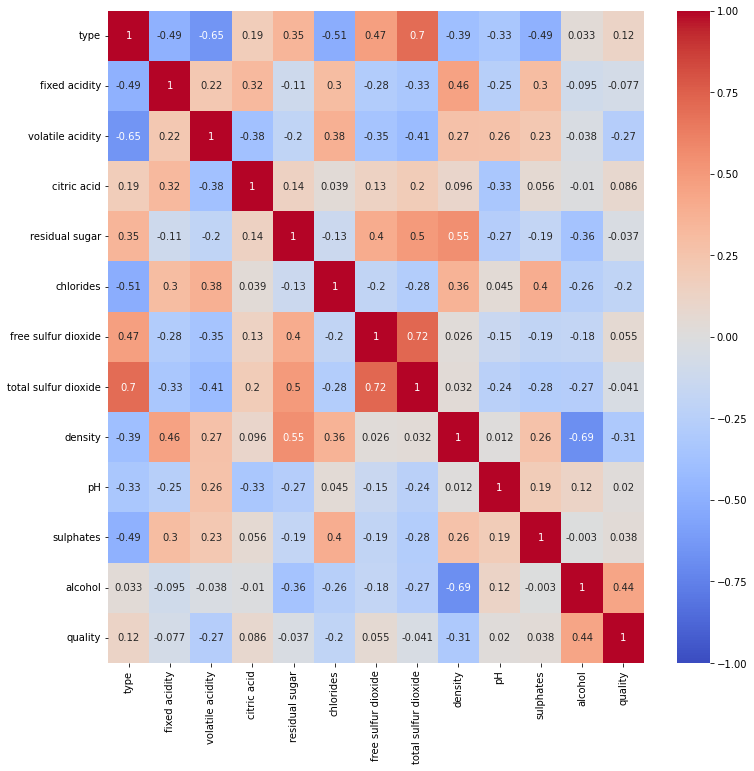

In [46]:
plt.figure(figsize = (12, 12))

sns.heatmap(df[['type', "fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
                      "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", 
                      "sulphates", "alcohol", "quality"]].corr(),
            vmin = -1,
            cmap = 'coolwarm',
            annot = True);

Din cele ce am observat în urma corelații pot menționa faptul că __"quality" este coloană țintă,__ de asemenea din analiza vizuală o corelație mai mare are au următoarele coloane: 

- coloanele __"free sulfur dioxide"__ cu __"total sulfure dioxide"__, 

- după care vine __"density"__ cu __"residual sugar"__,

- următoare fiind __"residual sugar"__ cu __"free sulfur dioxide"__ și __"total sulfure dioxide"__

dacă să consider că __"quality"__ este coloana țintă atunci cea mai mare corelație ea o are cu __"alcohol"__ 

de spus și de ce? - eu am selectat coloanele acestea - de văzut cum densitatea infulențează calintatea vinului, 
adică de explicat cum coloeanele selectate impactează quality

- Creați un al doilea set de date cu coloanele care au o corelație absolută între 0,5 și 0,8 cu coloana țintă.

In [47]:
# select the colums for corelation
cor = df[['type', "fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
                      "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", 
                      "sulphates", "alcohol", "quality"]].corr()
cor_target = abs(cor["quality"])

relevant_features = cor_target[cor_target > 0.3]

# relevant_features
print("Colomns > 0.3")
print(relevant_features)

Colomns > 0.3
density    0.305858
alcohol    0.444319
quality    1.000000
Name: quality, dtype: float64



- Împărțiți datele în 2 sub-seturi folosind funcția train_test_split de la sklearn.


In [48]:
# creat an subseet from all data sets
X = df[['type', "fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
                      "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", 
                      "sulphates", "alcohol"]]
# select the target column
y = df ['quality']


- Antrenează un model de regresie logistică sklearn pe baza datelor care ți se oferă.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create an instance of the LinearRegression class from sklearn. 
lg = LogisticRegression(max_iter = 5000) 
    
# Call the fit function, which applies the Linear Regression model # onto the data. 
lg.fit(X_train, y_train)
    
# Define a variable that stores the predictions of our model. 
y_pred = lg.predict(X_test) 
    
# Print the mean squared error and mean absolute error to get an idea of 
# how well the model has done. 
mean_squared_error(y_pred, y_test), mean_absolute_error(y_pred, y_test) 

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.6315384615384615, 0.5192307692307693)

- Antrenați o implementare de la zero a regresiei logistice pe sub-setul de tren

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

regressor = LogisticRegressionSig()

regressor.fit(X_train, y_train)

print(regressor.intercept_)

print(regressor.coef_)


KeyError: 0

- Testați modelele pe seturile de testare din setul inițial de date, pentru valorile erorilor utilizați funcția de scor model pentru modelul sklearn

In [51]:
# min value error - error - absolte, discret  - categ
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
run_experiment(model)

R^2 :  0.3084432008401331
MAE : 0.5576215804912679
RMSE: 0.710598303988032


- Împărțiți datele cu coloanele selectate în 2 sub-seturi folosind funcția train_test_split de la sklearn.

In [57]:
# creat an subseet from all data sets
X = df[["density", "alcohol"]]
# select the target column
y = df[['quality']]

In [55]:
X

,density,alcohol
0,1.00100,8.8
1,0.99400,9.5
2,0.99510,10.1
3,0.99560,9.9
4,0.99560,9.9
...,...,...
6492,0.99490,10.5
6493,0.99512,11.2
6494,0.99574,11.0
6495,0.99547,10.2


In [58]:
y

,quality
0,6
1,6
2,6
3,6
4,6
...,...
6492,5
6493,6
6494,6
6495,5


- Antrenați un model de regresie logistică sklearn pe datele cu coloanele selectate (subset de tren).

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create an instance of the LinearRegression class from sklearn. 
lg = LogisticRegression(max_iter = 2000) 
    
# Call the fit function, which applies the Linear Regression model # onto the data. 
lg.fit(X_train, y_train) 
    
# Define a variable that stores the predictions of our model. 
y_pred = lg.predict(X_test) 
    
# Print the mean squared error and mean absolute error to get an idea of 
# how well the model has done. 
mean_squared_error(y_pred, y_test), mean_absolute_error(y_pred, y_test) 

C:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.7138461538461538, 0.536923076923077)

- Antrenați o implementare de la zero a regresiei logistice pe sub-setul de tren.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

regressor = LogisticRegressionSig()

regressor.fit(X_train, y_train)

print(regressor.intercept_)

print(regressor.coef_)


KeyError: 0

- Testați modelele pe seturile de testare din setul inițial de date, pentru metrica erorilor folosiți funcția accuracy_score de la sklearn. metrici.


In [ ]:
# min value error - error - absolte, discret  - categ
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
run_experiment(model)

- Vă rugăm să încercați să interpretați rezultatele pe care le obțineți comparând acuratețea modelului pe seturile de testare.

In [37]:
import numpy as np 
class LogisticRegressionSig: 
    def __init__(self, learning_rate : float = 0.05, max_iter: int = 100000) -> None: 
        '''  
        The constructor of the Logistic Regression model. 
            :param learning_rate: float, default = 0.05 The learning rate of the model. 
            :param max_iter: int, default = 100000 The number of iterations to go through.
        '''
        # Setting up the hyperparameters. 
        self.__learning_rate = learning_rate 
        self.__max_iter = max_iter 
    def sigmoid(self, y : 'np.array') -> 'np.array': 
        return 1 / (1 + np.exp(-y)) 
        
        '''  
                The sigmoid function. :param y: np.array The predictions of the linear function 
            '''
        
    def fit(self, X : 'np.array', y : 'np.array') -> LogisticRegression: 
        ''' 
            The fit function of the model. 
                :param X: 2-d np.array The matrix with the features. 
                :param y: 1-d np.array The target vector. 
        '''
        # Creatting the weights vector
        self.coef_ = np.zeros(len(X[0]) + 1) 

        # Adding the intercept column. 
        X = np.hstack((X, np.ones((len(X), 1)))) 

        # The weights updating process. 
        for i in range(self.__max_iter): 
            # Prediction. 
            pred = self.sigmoid(np.dot(X, self.coef_)) 

            # Computing the gradient. 
            gradient = np.dot(X.T, (pred- y)) / y.size 

            # Updating the weights. 
            self.coef_-= gradient * self.__learning_rate 
        return self 
        
    def predict_proba(self, X : 'np.array')-> 'np.array': 
        ''' 
        This function returns the class probabilities. 
            :param X: 2-d np.array The features matrix. 
            :return: 2-d, np.array The array with the probabilities 
            for every class for every sample.
        ''' 
         # Adding the intercept column. 
        X = np.hstack((X, np.ones((len(X), 1)))) 

        # Computing the probabilities. 
        prob = self.sigmoid(np.dot(X, self.coef_)) 

        # Returning the probabilities. 
        return np.hstack(((1- prob).reshape(-1, 1), prob.reshape(-1, 1))) 

    def predict(self, X : 'np.array')-> 'np.array': 
        ''' 
            model. This function returns the predictions of the 
                :param X: 2-d np.array The features matrix. 
                :return: 2-d, np.array The array with the probabilities for every class for every sample.
        '''  
        # Adding the intercept column. 
        X = np.hstack((X, np.ones((len(X), 1)))) 

        return (self.sigmoid(np.dot(X, self.coef_)) > 0.5) 



In [ ]:
# *1 Now using sklearn: 
        # Importing the laod_iris function and LogisticRegression model from sklearn. 
from sklearn.datasets import load_iris 
from sklearn.linear_model import LogisticRegression 
        
# Getting the feature matrix and target vector from the iris data set. 
X, y = load_iris(return_X_y = True) 

# Creatting the model. 
clf = LogisticRegression(random_state=0) 

# Fitting the model. 
clf.fit(X, y) 
# Making predictions with the Logistic Regression model. 
y_pred = clf.predict(X)